In [ ]:
%pip install qiskit[visualization]==1.0.2

In [ ]:
import qiskit
qiskit.__version__

%pip show pylatexenc matplotlib qc_grader


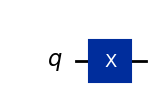

In [4]:
from qiskit import QuantumCircuit

# Create a new circuit with a single qubit
qc = QuantumCircuit(1)

# Add a Not gate to qubit 0
qc.x(0)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

In [ ]:
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib
%pip install pylatexenc
%pip install prototype-zne
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

In [ ]:
%pip show pylatexenc matplotlib qc_grader


In [2]:
%set_env QXToken=5afc660b794f3817841b0d56e983fe0fd754ec75e00b94c9077c7a0f2221137eda7dc80c2e9b854753654d8ac14e657443b107daca24ede479620ca49f950e6b

env: QXToken=5afc660b794f3817841b0d56e983fe0fd754ec75e00b94c9077c7a0f2221137eda7dc80c2e9b854753654d8ac14e657443b107daca24ede479620ca49f950e6b


In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qc_grader.challenges.iqc_2024 import grade_lab0_ex1

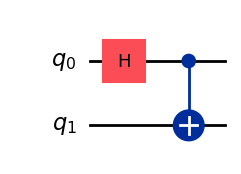

In [6]:
 from qiskit import QuantumCircuit
 qc = QuantumCircuit(2)
 qc.h(0)
 qc.cx(0, 1)
 qc.draw(output='mpl')

In [19]:
# The ZZ applies a Z operator on qubit 0, and a Z operator on qubit 1
ZZ = SparsePauliOp('ZZ')

# The ZI applies a Z operator on qubit 0, and an Identity operator on qubit 1
ZI = SparsePauliOp('ZI')

# The IX applies an Identity operator on qubit 0, and an X operator on qubit 1
IX = SparsePauliOp('IX')



### Write your code below here ###
IZ = SparsePauliOp('IZ')
XX = SparsePauliOp('XX')
XI = SparsePauliOp('XI')
### Follow the same naming convention we used above



## Don't change any code past this line, but remember to run the cell.

observables = [IZ, IX, ZI, XI, ZZ, XX]

In [20]:
grade_lab0_ex1(observables)


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [21]:
# Set up the Estimator
estimator = Estimator(backend=AerSimulator())

# Submit the circuit to Estimator
pub = (qc, observables)

job = estimator.run(pubs=[pub])

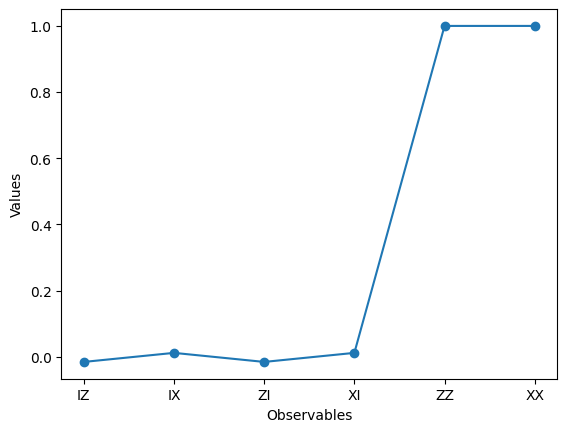

In [22]:
# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result()[0].data.evs

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()

In [27]:
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

In [28]:
from qc_grader.challenges.iqc_2024 import (
    grade_lab1_ex1,
    grade_lab1_ex2,
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6,
    grade_lab1_ex7,
)

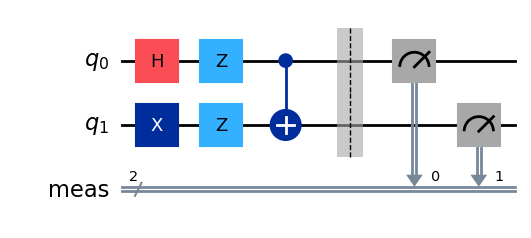

In [38]:
# Build a circuit to form a psi-minus Bell state
# Apply gates to the provided QuantumCircuit, qc

qc = QuantumCircuit(2)

### Write your code below here ###
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.z(1)
qc.z(0)
qc.cx(0, 1)
qc.draw(output='mpl')
ZX= SparsePauliOp('ZX')
XX = SparsePauliOp('XX')
ZZ = SparsePauliOp('ZZ')
XZ = SparsePauliOp('XZ')

observables = [ZZ, ZX, ZZ, XX]
### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

In [36]:
grade_lab1_ex1(qc) # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [42]:
qc.measure_all()

### Write your code below here ###


sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub])


### Don't change any code past this line ###

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'10': 533, '01': 491}


In [43]:
grade_lab1_ex2(job_sampler) # Expected result type: PrimitiveJob

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


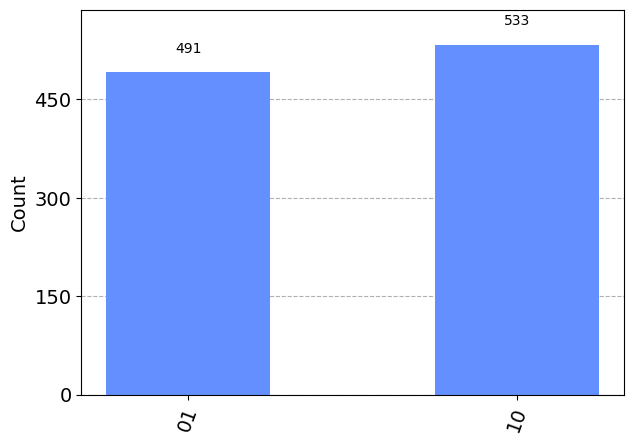

In [44]:
plot_histogram(counts_sampler)

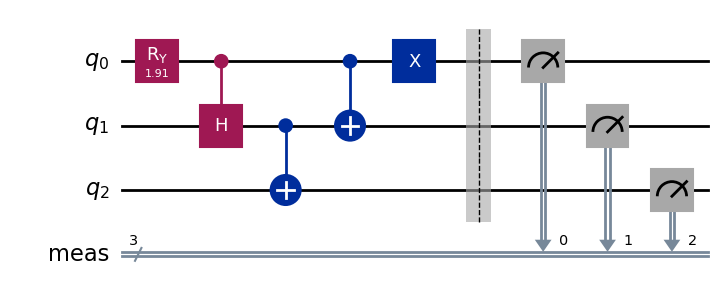

In [299]:
# Step 1
qc = QuantumCircuit(3)

# Step 2 (provided)
qc.ry(1.91063324, 0)

# Add steps 3-6 below
qc.ch(0,1)
qc.cx(1,2)
qc.cx(0,1)
qc.x(0)


### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

In [300]:
# Submit your answer using following code

grade_lab1_ex3(qc) # Expected result type: # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


{'001': 3320, '010': 3321, '100': 3359}


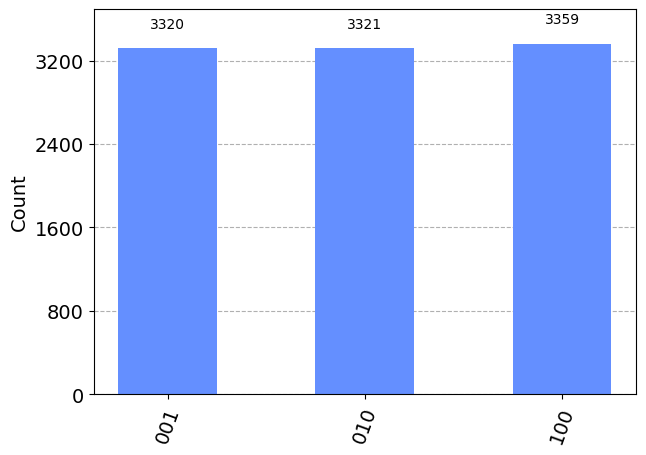

In [91]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)
plot_histogram(counts_sampler)

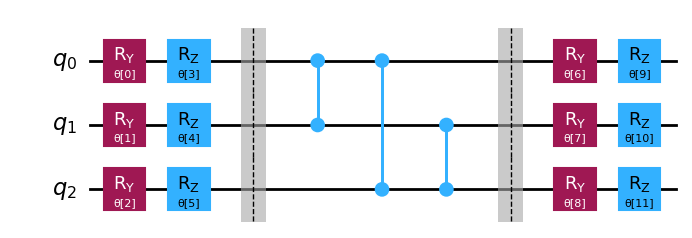

In [274]:
num_qubits=3
rotation_blocks = ["ry","rz"]
entanglement_blocks = "cz"
entanglement = "full"

ansatz=TwoLocal(
    num_qubits=3,
    rotation_blocks=['ry', 'rz'],
    entanglement_blocks='cz',
    entanglement=['full'],
    reps=1,
    insert_barriers=True,
)

### Don't change any code past this line ###
ansatz.decompose().draw('mpl')

In [167]:
grade_lab1_ex4(num_qubits, rotation_blocks, entanglement_blocks, entanglement) # Expected result type: int, List[str], str, str

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
backend_answer = FakeSherbrooke()
optimization_level_answer==0
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)
isa_circuit=pm.run(ansatz)


In [ ]:
grade_lab1_ex5(isa_circuit) # Expected result type: QuantumCircuit

In [ ]:
isa_circuit.draw('mpl', idle_wires=False,)

In [210]:
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

In [292]:
def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): []
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs

    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = params
    callback_dict["cost_history"].append(energy)
    
### Don't change any code past this line ###
    print(energy)
    return energy, result



In [293]:
# Submit your answer using following code

grade_lab1_ex6(cost_func) # Expected result type: Callable

[[0.65136719]]
Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [290]:
x0 = 2 * np.pi * np.random.random([num_params])
x0
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [295]:
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

In [296]:

### Select a Backend
## Use FakeSherbrooke to simulate with noise that matches closer to the real experiment. This will run slower.
## Use AerSimulator to simulate without noise to quickly iterate. This will run faster.

#backend = FakeSherbrooke()
backend = AerSimulator()

x0 = 2 * np.pi * np.random.random([num_params])
x0
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}



# ### Don't change any code past this line ###

# Here we have updated the cost function to return only the energy to be compatible with recent scipy versions (>=1.10)
def cost_func_2(*args, **kwargs):
    energy, result = cost_func(*args, **kwargs)
    return energy

with Session(backend=backend) as session:
    estimator = Estimator(session=session)

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, hamiltonian_isa, estimator, callback_dict),
        method="cobyla",
        options={'maxiter': 100})

[-0.6640625]
[-0.85498047]
[-1.44677734]
[-1.29394531]
[-1.43945312]
[-1.36621094]
[-1.77294922]
[-1.49121094]
[-2.23681641]
[-2.33691406]
[-2.37060547]
[-2.36621094]
[-2.36621094]
[-2.40625]
[-1.85009766]
[-2.10449219]
[-2.19238281]
[-2.68994141]
[-2.74951172]
[-2.57373047]
[-2.67480469]
[-2.22705078]
[-2.61328125]
[-2.44189453]
[-2.36376953]
[-2.73046875]
[-2.46191406]
[-2.72509766]
[-2.4765625]
[-2.734375]
[-2.88867188]
[-2.95410156]
[-2.99365234]
[-2.99609375]
[-2.93798828]
[-2.98583984]
[-2.97265625]
[-2.99609375]
[-2.97900391]
[-2.99414062]
[-2.98730469]
[-3.]
[-2.99121094]
[-2.98974609]
[-2.96630859]
[-2.98242188]
[-2.99267578]
[-2.99951172]
[-2.99365234]
[-2.98876953]
[-2.98242188]
[-2.99267578]
[-2.99658203]
[-2.99414062]
[-2.99121094]
[-2.99267578]
[-2.99609375]
[-2.99511719]
[-2.99658203]
[-2.99462891]
[-2.99267578]
[-2.99804688]
[-2.99755859]
[-2.99707031]
[-2.99560547]
[-2.99560547]
[-2.99707031]
[-2.99609375]
[-2.99511719]
[-2.99853516]
[-2.99462891]
[-2.99511719]
[-2.997

In [297]:
grade_lab1_ex7(res) # Expected result type: OptimizeResult

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


lab 2